In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import *
plt.style.use('fivethirtyeight')

%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 10)

In [28]:
df = pd.read_excel('nasdaq_ready_pycaret2.xlsx', index_col = 0)
df

,date,close,year,month,day,season,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
14,2015-12-28,5040.990234,2015,12,28,1,5048.490234,5045.930176,5001.109863,4968.919922,4923.080078,5002.549805,5071.129883,4995.359863,4952.229980,4933.470215,5045.169922,5022.870117,5098.240234,5101.810059
15,2015-12-29,5107.939941,2015,12,29,1,5040.990234,5048.490234,5045.930176,5001.109863,4968.919922,4923.080078,5002.549805,5071.129883,4995.359863,4952.229980,4933.470215,5045.169922,5022.870117,5098.240234
16,2015-12-30,5065.850098,2015,12,30,1,5107.939941,5040.990234,5048.490234,5045.930176,5001.109863,4968.919922,4923.080078,5002.549805,5071.129883,4995.359863,4952.229980,4933.470215,5045.169922,5022.870117
17,2015-12-31,5007.410156,2015,12,31,1,5065.850098,5107.939941,5040.990234,5048.490234,5045.930176,5001.109863,4968.919922,4923.080078,5002.549805,5071.129883,4995.359863,4952.229980,4933.470215,5045.169922
18,2016-01-04,4903.089844,2016,1,4,1,5007.410156,5065.850098,5107.939941,5040.990234,5048.490234,5045.930176,5001.109863,4968.919922,4923.080078,5002.549805,5071.129883,4995.359863,4952.229980,4933.470215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-11-30,12198.740234,2020,11,30,4,12205.849609,12094.400391,12036.790039,11880.629883,11854.969727,11904.709961,11801.599609,11899.339844,11924.129883,11829.290039,11709.589844,11786.429688,11553.860352,11713.780273
1255,2020-12-01,12355.110352,2020,12,1,1,12198.740234,12205.849609,12094.400391,12036.790039,11880.629883,11854.969727,11904.709961,11801.599609,11899.339844,11924.129883,11829.290039,11709.589844,11786.429688,11553.860352
1256,2020-12-02,12349.370117,2020,12,2,1,12355.110352,12198.740234,12205.849609,12094.400391,12036.790039,11880.629883,11854.969727,11904.709961,11801.599609,11899.339844,11924.129883,11829.290039,11709.589844,11786.429688
1257,2020-12-03,12377.179688,2020,12,3,1,12349.370117,12355.110352,12198.740234,12205.849609,12094.400391,12036.790039,11880.629883,11854.969727,11904.709961,11801.599609,11899.339844,11924.129883,11829.290039,11709.589844


In [29]:
setter = setup(data=df, target="close", train_size=0.7, data_split_shuffle = False, )

 
Setup Succesfully Completed.


,Description,Value
0,session_id,6602
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1245, 20)"
4,Missing Values,False
5,Numeric Features,15
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [64]:
good = pd.DataFrame(setter[0])
good

,day,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,date_month_9,date_weekday_0,date_weekday_1,date_weekday_2,date_weekday_3,date_weekday_4,date_is_month_end_0,date_is_month_end_1,date_is_month_start_0,date_is_month_start_1
14,28.0,5048.490234,5045.930176,5001.109863,4968.919922,4923.080078,5002.549805,5071.129883,4995.359863,4952.229980,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15,29.0,5040.990234,5048.490234,5045.930176,5001.109863,4968.919922,4923.080078,5002.549805,5071.129883,4995.359863,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
16,30.0,5107.939941,5040.990234,5048.490234,5045.930176,5001.109863,4968.919922,4923.080078,5002.549805,5071.129883,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
17,31.0,5065.850098,5107.939941,5040.990234,5048.490234,5045.930176,5001.109863,4968.919922,4923.080078,5002.549805,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
18,4.0,5007.410156,5065.850098,5107.939941,5040.990234,5048.490234,5045.930176,5001.109863,4968.919922,4923.080078,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,30.0,12205.849609,12094.400391,12036.790039,11880.629883,11854.969727,11904.709961,11801.599609,11899.339844,11924.129883,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1255,1.0,12198.740234,12205.849609,12094.400391,12036.790039,11880.629883,11854.969727,11904.709961,11801.599609,11899.339844,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1256,2.0,12355.110352,12198.740234,12205.849609,12094.400391,12036.790039,11880.629883,11854.969727,11904.709961,11801.599609,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1257,3.0,12349.370117,12355.110352,12198.740234,12205.849609,12094.400391,12036.790039,11880.629883,11854.969727,11904.709961,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [30]:
besters = compare_models(fold=10, round=2, sort='RMSE', n_select=3, turbo = True, verbose = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Huber Regressor,45.32,4598.40,61.09,0.88,0.01,0.01,0.05
1,Bayesian Ridge,45.70,4569.98,61.21,0.88,0.01,0.01,0.01
2,Elastic Net,45.76,4591.23,61.40,0.88,0.01,0.01,0.02
3,Lasso Regression,45.99,4621.14,61.68,0.88,0.01,0.01,0.02
4,Orthogonal Matching Pursuit,46.80,4692.00,62.35,0.88,0.01,0.01,0.00
5,Ridge Regression,49.67,5150.20,65.59,0.87,0.01,0.01,0.00
6,TheilSen Regressor,50.26,5488.84,66.18,0.87,0.01,0.01,1.58
7,Linear Regression,51.67,5714.36,67.76,0.86,0.01,0.01,0.01
8,Random Sample Consensus,51.67,5714.36,67.76,0.86,0.01,0.01,0.01
9,Lasso Least Angle Regression,55.37,5641.13,69.91,0.85,0.01,0.01,0.00


In [31]:
blender = blend_models(estimator_list = besters, fold = 10, optimize = "RMSE", turbo = True, verbose = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,45.1206,3574.7858,59.7895,0.9073,0.0129,0.0097
1,30.8123,1946.4872,44.1190,0.9458,0.0091,0.0063
2,31.7484,1626.6094,40.3312,0.8654,0.0077,0.0060
3,20.7616,772.4857,27.7936,0.9706,0.0048,0.0036
4,32.9748,2159.1008,46.4661,0.8085,0.0074,0.0053
5,28.1561,1482.6459,38.5051,0.9767,0.0056,0.0041
6,68.1630,8555.9366,92.4983,0.7459,0.0130,0.0095
7,43.6825,3228.9326,56.8237,0.8789,0.0073,0.0056
8,99.4824,16509.1567,128.4880,0.8562,0.0182,0.0140
9,53.1776,5730.6587,75.7011,0.8857,0.0098,0.0069


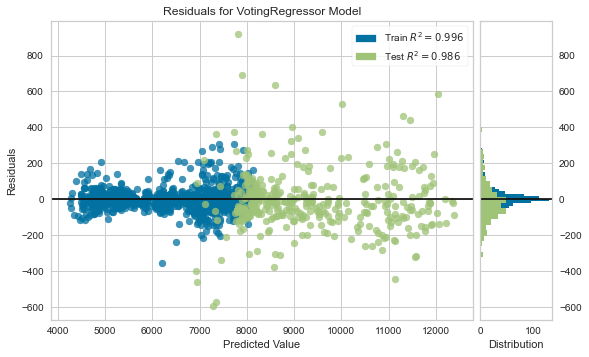

In [56]:
plot_model(blender, plot="residuals")

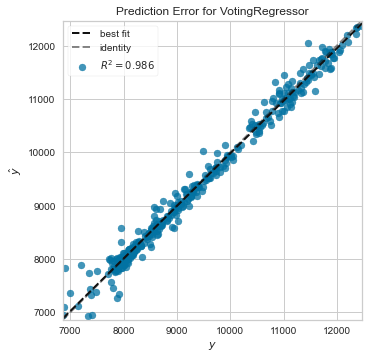

In [57]:
plot_model(blender, plot="error")

# for문으로 짜는거보다 값 옮기는게 5000배는 빠를 것 같아서 손으로 직접 옮기는 것으로 변경

In [51]:
test = pd.read_excel('nasdaq_ready_pycaret2_predict.xlsx', index_col = 0)
result = predict_model(blender, data=test, round=4, verbose=True)

In [65]:
result.tail(25)

,date,close,year,month,day,season,lag_1,lag_2,lag_3,lag_4,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,Label
index,,,,,,,,,,,,,,,,,,,,,
1241,2020-11-10,11553.860352,2020,11,10,4,11713.780273,11895.230469,11890.929688,11590.780273,...,10957.610352,10911.589844,11185.589844,11004.870117,11431.349609,11358.940430,11548.280273,11506.009766,11484.690430,11729.6349
1242,2020-11-11,11786.429688,2020,11,11,4,11553.860352,11713.780273,11895.230469,11890.929688,...,11160.570313,10957.610352,10911.589844,11185.589844,11004.870117,11431.349609,11358.940430,11548.280273,11506.009766,11586.4969
1243,2020-11-12,11709.589844,2020,11,12,4,11786.429688,11553.860352,11713.780273,11895.230469,...,11590.780273,11160.570313,10957.610352,10911.589844,11185.589844,11004.870117,11431.349609,11358.940430,11548.280273,11745.3629
1244,2020-11-13,11829.290039,2020,11,13,4,11709.589844,11786.429688,11553.860352,11713.780273,...,11890.929688,11590.780273,11160.570313,10957.610352,10911.589844,11185.589844,11004.870117,11431.349609,11358.940430,11679.0216
1245,2020-11-16,11924.129883,2020,11,16,4,11829.290039,11709.589844,11786.429688,11553.860352,...,11895.230469,11890.929688,11590.780273,11160.570313,10957.610352,10911.589844,11185.589844,11004.870117,11431.349609,11768.7001
1246,2020-11-17,11899.339844,2020,11,17,4,11924.129883,11829.290039,11709.589844,11786.429688,...,11713.780273,11895.230469,11890.929688,11590.780273,11160.570313,10957.610352,10911.589844,11185.589844,11004.870117,11877.0873
1247,2020-11-18,11801.599609,2020,11,18,4,11899.339844,11924.129883,11829.290039,11709.589844,...,11553.860352,11713.780273,11895.230469,11890.929688,11590.780273,11160.570313,10957.610352,10911.589844,11185.589844,11874.1943
1248,2020-11-19,11904.709961,2020,11,19,4,11801.599609,11899.339844,11924.129883,11829.290039,...,11786.429688,11553.860352,11713.780273,11895.230469,11890.929688,11590.780273,11160.570313,10957.610352,10911.589844,11839.1637
1249,2020-11-20,11854.969727,2020,11,20,4,11904.709961,11801.599609,11899.339844,11924.129883,...,11709.589844,11786.429688,11553.860352,11713.780273,11895.230469,11890.929688,11590.780273,11160.570313,10957.610352,11942.0115


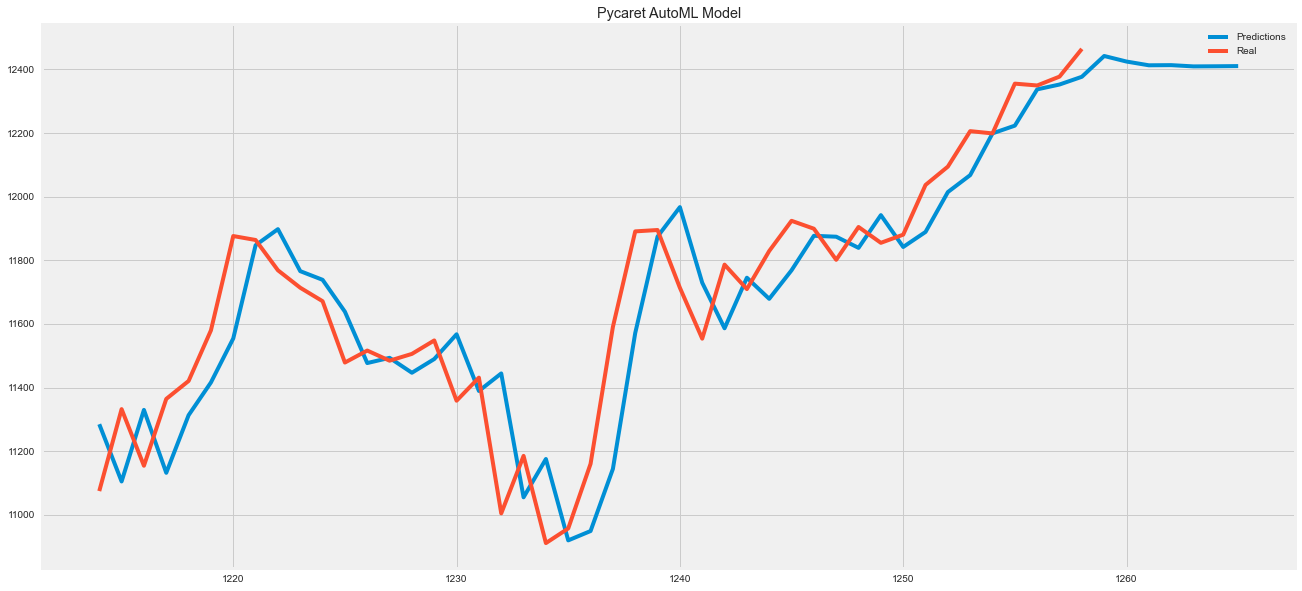

In [70]:
plt.title("Pycaret AutoML Model")
plt.plot(result.iloc[1200:]['Label'])
plt.plot(df.iloc[1200:]['close'])
plt.legend(['Predictions', 'Real'], loc='upper right')
plt.show()